In [6]:
# import openai libraries
from openai import OpenAI
import pandas as pd

In [9]:
client = OpenAI()

def get_embedding(text):
    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

# test the function, and print embedding shape for sample text
text = "Hello, World!"
embedding = get_embedding(text)
print(f"Embedding shape: {len(embedding)}")

Embedding shape: 3072


In [3]:
# read json objects, line by line, in json/data-barn-delights.jsonl into a dataframe
df = pd.read_json('json/data-barn-delights.jsonl', lines=True)

In [10]:
# create a new column, named embedding in the dataframe calling get_embedding for text column
df['embedding'] = df['text'].apply(get_embedding)


In [12]:
df

,id,meta_color,meta_department,text,embedding
0,apple,red,grocery,This fresh red apple is perfect for snacking o...,"[-0.025402866303920746, 0.003944507334381342, ..."
1,asparagus,green,grocery,This fresh green asparagus is ideal for health...,"[-0.01680482178926468, 0.00515124062076211, -0..."
2,blueberries,blue,grocery,These fresh blue blueberries are perfect for s...,"[-0.0001401858462486416, -0.017988258972764015..."
3,fertilizer,green,garden,This green fertilizer boosts plant growth and ...,"[0.03176712617278099, 0.040206827223300934, -0..."
4,frozen-peas,green,grocery,These green frozen peas are a versatile and he...,"[-0.006324452348053455, -0.003084146650508046,..."
5,mop,red,cleaning,This red mop is designed for efficient floor c...,"[-0.019719429314136505, -0.017681213095784187,..."
6,pasta-sauce,red,grocery,This red pasta sauce is perfect for adding fla...,"[-0.04293821007013321, -0.025952879339456558, ..."
7,planting-bed,red,garden,This red planting bed is ideal for creating or...,"[-0.01462164893746376, -0.004197985399514437, ..."
8,sponge,green,cleaning,This green sponge is perfect for all your clea...,"[-0.01613166742026806, -0.011921314522624016, ..."
9,sports-drink,blue,grocery,This blue sports drink is designed to keep you...,"[0.012868019752204418, -0.000514819344971329, ..."


/Users/ngoodman/.pyenv/versions/3.12.1/envs/notebooks/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


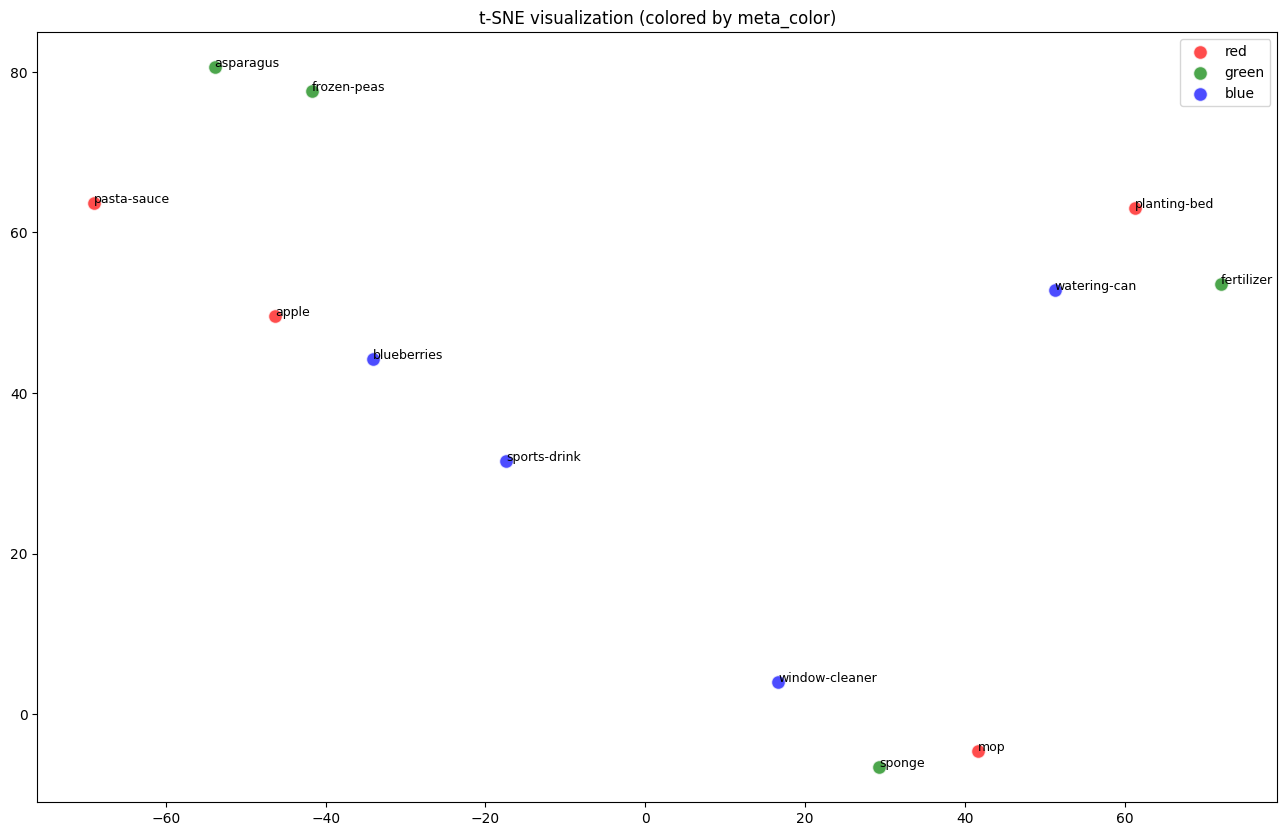

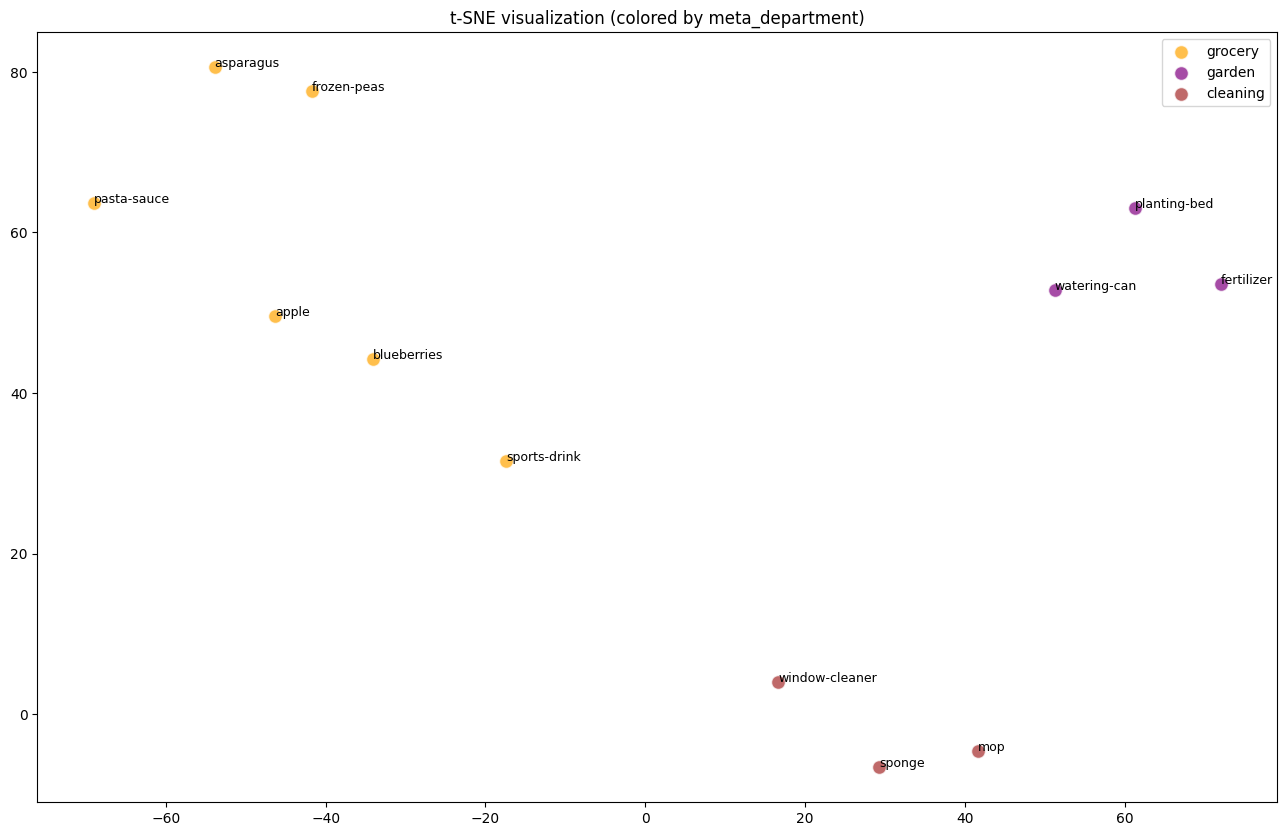

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sample dataframe based on the provided data

# Convert embeddings to numpy array
embeddings = np.array(df['embedding'].tolist())

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=3, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Add t-SNE results to dataframe
df['tsne-2d-one'] = embeddings_2d[:,0]
df['tsne-2d-two'] = embeddings_2d[:,1]

# Function to plot t-SNE with labels
def plot_tsne(df, label_col, title):
    plt.figure(figsize=(16, 10))
    colors = {'red': 'red', 'green': 'green', 'blue': 'blue'}
    departments = {'grocery': 'orange', 'garden': 'purple', 'cleaning': 'brown'}
    if label_col == 'meta_color':
        color_map = colors
    else:
        color_map = departments
    
    for i in range(len(df)):
        plt.scatter(df['tsne-2d-one'][i], df['tsne-2d-two'][i], c=color_map[df[label_col][i]], label=df[label_col][i], alpha=0.7, edgecolors='w', s=100)
        plt.text(df['tsne-2d-one'][i]+0.01, df['tsne-2d-two'][i]+0.01, df['id'][i], fontsize=9)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title(title)
    plt.show()

# Plot t-SNE based on color
plot_tsne(df, 'meta_color', 't-SNE visualization (colored by meta_color)')

# Plot t-SNE based on department
plot_tsne(df, 'meta_department', 't-SNE visualization (colored by meta_department)')
